In [1]:
import pandas as pd
from pandas import DataFrame
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import random_correlation
from IPython.display import IFrame
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
spotify_load_data="Spotify1.csv"
# Files to load
spotify_data_to_load="spotify1.csv"
spotify_data_to_load2="spotify_2.csv"
spotify_data_to_load3="online_presence2.csv"
spotify_data_to_load4="youtube_popular.csv"
spotify_data_to_load5="topIG.csv"

In [4]:
# read data and store in pandas
spotify1 = pd.read_csv(spotify_data_to_load)
spotify_2=pd.read_csv(spotify_data_to_load2)
online_presence=pd.read_csv(spotify_data_to_load3)
youtube_popular=pd.read_csv(spotify_data_to_load4)
topIG=pd.read_csv(spotify_data_to_load5) 

In [5]:
spotify1.head()

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024
3,4,J. Cole,No Role Modelz,734857487
4,5,Post Malone,rockstar,718865961


In [6]:
spotify_2.head()

,Position,Song,Streams,Artist,Release Date
0,1,Shape of You,3327000,Ed Sheeran,1/6/2017
1,2,Blinding Lights,3323000,The Weeknd,11/29/2019
2,3,Dance Monkey,2721000,Tones And I,5/10/2019
3,4,Someone You Loved,2588000,Lewis Capaldi,11/8/2018
4,5,Rockstar,2570000,Post Malone featuring 21 Savage,9/15/2017


In [7]:
online_presence.head()

,Position,Artist,Category,Followers,Biggest Platform
0,2,Justin Bieber,Music,"455,000,000",Instagram
1,3,Ariana Grande,Music,"429,000,000",Instagram
2,4,Selena Gomez,Music,"425,000,000",Instagram
3,5,Taylor Swift,Music,"361,000,000",Instagram
4,7,Katy Perry,Music,"338,000,000",Instagram


In [8]:
youtube_popular.head()

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,1,T-Series,222000000,19845000000,17317,Music,2006
1,12,Zee Music Company,86700000,49067711243,6603,Music,2014
2,19,BANGTANTV,70000000,17471090750,1787,Music,2012
3,20,Justin Bieber,69700000,28567240999,247,Music,2007
4,21,HYBE LABELS,67800000,24013849120,971,Music,2008


In [9]:
topIG.head()

,Country,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
1,All,10,billieeilish,BILLIE EILISH,https://www.instagram.com/billieeilish/,Music,100000000,United States,5300000,7000000,2/7/2022 16:50
2,All,12,lalalalisa_m,LISA,https://www.instagram.com/lalalalisa_m/,Music,73100000,Indonesia,7500000,8600000,2/7/2022 16:50
3,All,13,jennierubyjane,J,https://www.instagram.com/jennierubyjane/,Music,62300000,Indonesia,6400000,7600000,2/7/2022 16:50
4,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50


In [10]:
agg=pd.concat([spotify1, online_presence.reset_index(drop=True), spotify_2.reset_index(drop=True), youtube_popular.reset_index(drop=True), topIG.reset_index(drop=True)], axis=0)
agg.head()

,Position,Artist,Song,Streams,Category,Followers,Biggest Platform,Release Date,Subscribers,Views,Video Count,Country,Account,Link,Audience Country,Authentic engagement,Engagement avg,Scraped
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11614 entries, 0 to 182
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Position              11614 non-null  int64  
 1   Artist                11608 non-null  object 
 2   Song                  11180 non-null  object 
 3   Streams               11184 non-null  float64
 4   Category              430 non-null    object 
 5   Followers             208 non-null    object 
 6   Biggest Platform      25 non-null     object 
 7   Release Date          322 non-null    object 
 8   Subscribers           222 non-null    float64
 9   Views                 222 non-null    float64
 10  Video Count           222 non-null    float64
 11  Country               183 non-null    object 
 12  Account               183 non-null    object 
 13  Link                  183 non-null    object 
 14  Audience Country      182 non-null    object 
 15  Authentic engagement 

In [12]:
agg_df=pd.concat(
map(pd.read_csv, ['spotify1.csv', 'spotify_2.csv','online_presence2.csv','youtube_popular.csv', 'topIG.csv',  ]),ignore_index=True)
agg_df.head() 

,Position,Artist,Song,Streams,Release Date,Category,Followers,Biggest Platform,Subscribers,Views,Video Count,Country,Account,Link,Audience Country,Authentic engagement,Engagement avg,Scraped
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pd.concat

<function pandas.core.reshape.concat.concat(objs: Union[Iterable[Union[ForwardRef('DataFrame'), ForwardRef('Series')]], Mapping[Union[Hashable, NoneType], Union[ForwardRef('DataFrame'), ForwardRef('Series')]]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]>

In [14]:
agg_df=agg_df[["Position", "Artist", "Song", "Release Date", "Biggest Platform", "Streams", "Followers", "Subscribers", "Views", "Video Count", "Authentic engagement", "Engagement avg"]]

In [15]:

print(agg.columns)
print(agg_df.columns)

Index(['Position', 'Artist', 'Song', 'Streams', 'Category', 'Followers',
       'Biggest Platform', 'Release Date', 'Subscribers', 'Views',
       'Video Count', 'Country', 'Account', 'Link', 'Audience Country',
       'Authentic engagement', 'Engagement avg', 'Scraped'],
      dtype='object')
Index(['Position', 'Artist', 'Song', 'Release Date', 'Biggest Platform',
       'Streams', 'Followers', 'Subscribers', 'Views', 'Video Count',
       'Authentic engagement', 'Engagement avg'],
      dtype='object')


In [16]:
agg=agg[["Position", "Artist", "Song", "Streams", "Followers", "Subscribers","Views", "Video Count", "Authentic engagement", "Engagement avg"]] 

In [17]:
agg.head()


,Position,Artist,Song,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
agg_df.head()

,Position,Artist,Song,Release Date,Biggest Platform,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,NaN,NaN,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,NaN,NaN,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,NaN,NaN,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,NaN,NaN,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,NaN,NaN,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


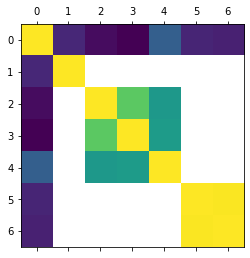

In [19]:
plt.matshow(agg_df.corr())
plt.show()

In [20]:
agg_df.describe()

,Position,Streams,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
count,11614.000000,1.118400e+04,2.220000e+02,2.220000e+02,222.000000,1.830000e+02,1.830000e+02
mean,5305.771224,1.816161e+07,2.303739e+07,1.228647e+10,2298.815315,6.662803e+05,9.245306e+05
std,3308.788726,5.198310e+07,1.876792e+07,8.408765e+09,5846.831776,1.018560e+06,1.289282e+06
min,1.000000,4.432300e+04,1.090000e+07,5.469050e+08,7.000000,0.000000e+00,9.210000e+04
25%,2374.250000,3.887252e+05,1.330000e+07,6.016301e+09,123.500000,1.927000e+05,2.925500e+05
50%,5277.500000,1.704876e+06,1.700000e+07,1.022484e+10,272.000000,3.802000e+05,5.574000e+05
75%,8180.750000,1.061061e+07,2.605000e+07,1.640835e+10,1721.750000,7.118500e+05,9.687000e+05
max,11084.000000,8.833697e+08,2.220000e+08,5.065893e+10,58623.000000,7.500000e+06,8.600000e+06


In [21]:
spotify1.describe()

,Position,Streams
count,11084.000000,1.108400e+04
mean,5542.500000,1.830891e+07
std,3199.819526,5.219383e+07
min,1.000000,4.432300e+04
25%,2771.750000,3.824272e+05
50%,5542.500000,1.704876e+06
75%,8313.250000,1.078333e+07
max,11084.000000,8.833697e+08


In [22]:
spotify_2.describe()

,Position,Streams
count,100.000000,1.000000e+02
mean,50.500000,1.835170e+06
std,29.011492,3.597123e+05
min,1.000000,1.478000e+06
25%,25.750000,1.596500e+06
50%,50.500000,1.709000e+06
75%,75.250000,1.977250e+06
max,100.000000,3.327000e+06


In [23]:
online_presence.describe()

,Position
count,25.000000
mean,23.560000
std,14.586181
min,2.000000
25%,13.000000
50%,23.000000
75%,34.000000
max,48.000000


In [24]:
youtube_popular.describe()

,Position,Subscribers,Views,Video Count,Release Date
count,222.000000,2.220000e+02,2.220000e+02,222.000000,222.000000
mean,441.720721,2.303739e+07,1.228647e+10,2298.815315,2010.720721
std,296.361439,1.876792e+07,8.408765e+09,5846.831776,3.181312
min,1.000000,1.090000e+07,5.469050e+08,7.000000,2005.000000
25%,178.500000,1.330000e+07,6.016301e+09,123.500000,2008.250000
50%,421.000000,1.700000e+07,1.022484e+10,272.000000,2011.000000
75%,687.750000,2.605000e+07,1.640835e+10,1721.750000,2013.000000
max,997.000000,2.220000e+08,5.065893e+10,58623.000000,2019.000000


In [25]:
topIG.describe()

,Position,Followers,Authentic engagement,Engagement avg
count,183.000000,1.830000e+02,1.830000e+02,1.830000e+02
mean,461.508197,2.773115e+07,6.662803e+05,9.245306e+05
std,298.792476,3.609971e+07,1.018560e+06,1.289282e+06
min,9.000000,3.200000e+06,0.000000e+00,9.210000e+04
25%,213.000000,1.045000e+07,1.927000e+05,2.925500e+05
50%,433.000000,1.650000e+07,3.802000e+05,5.574000e+05
75%,728.500000,2.860000e+07,7.118500e+05,9.687000e+05
max,994.000000,2.941000e+08,7.500000e+06,8.600000e+06


In [26]:
agg_df.corr()

,Position,Streams,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
Position,1.000000,-0.493547,-0.622847,-0.680927,-0.173026,-0.503685,-0.523839
Streams,-0.493547,1.000000,NaN,NaN,NaN,NaN,NaN
Subscribers,-0.622847,NaN,1.000000,0.576074,0.212340,NaN,NaN
Views,-0.680927,NaN,0.576074,1.000000,0.241844,NaN,NaN
Video Count,-0.173026,NaN,0.212340,0.241844,1.000000,NaN,NaN
Authentic engagement,-0.503685,NaN,NaN,NaN,NaN,1.000000,0.987334
Engagement avg,-0.523839,NaN,NaN,NaN,NaN,0.987334,1.000000


In [27]:
# shape
print(f'We have {agg_df.shape[0]} rows and {agg_df.shape[1]} colums in dataset.')

We have 11614 rows and 12 colums in dataset.


In [28]:
# check for  NaN
agg_df.isna().sum() / len(agg_df)

Position                0.000000
Artist                  0.000517
Song                    0.037369
Release Date            0.972275
Biggest Platform        0.997847
Streams                 0.037024
Followers               0.982091
Subscribers             0.980885
Views                   0.980885
Video Count             0.980885
Authentic engagement    0.984243
Engagement avg          0.984243
dtype: float64

In [29]:
spotify1.isna().sum() / len(spotify1)

Position    0.000000
Artist      0.000000
Song        0.000361
Streams     0.000000
dtype: float64

In [30]:
spotify_2.isna().sum() / len(spotify_2)

Position        0.0
Song            0.0
Streams         0.0
Artist          0.0
Release Date    0.0
dtype: float64

In [31]:
online_presence.isna().sum()/len(online_presence)

Position            0.0
Artist              0.0
Category            0.0
Followers           0.0
Biggest Platform    0.0
dtype: float64

In [32]:
youtube_popular.isna().sum()/len(online_presence)

Position        0.0
Artist          0.0
Subscribers     0.0
Views           0.0
Video Count     0.0
Category        0.0
Release Date    0.0
dtype: float64

In [33]:
topIG.isna().sum()/len(topIG)

Country                 0.000000
Position                0.000000
Account                 0.000000
Artist                  0.032787
Link                    0.000000
Category                0.000000
Followers               0.000000
Audience Country        0.005464
Authentic engagement    0.000000
Engagement avg          0.000000
Scraped                 0.000000
dtype: float64

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
agg_df =agg_df.to_csv('agg_df;, index = False')

In [37]:
# commenting out bc it's large
#display(agg_df)

In [36]:
# filter
df1=spotify1.reset_index(drop=True)
df1=df1.sort_values(["Streams"], ascending=False).head(2)
df1.head()

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399


In [38]:
df3=online_presence.reset_index(drop=True)
d3=df3.sort_values(["Followers"], ascending=False).head(2)
df2=spotify_2.reset_index(drop=True)
df2=df2.sort_values(["Streams"], ascending=False).head(2)
df4=youtube_popular.reset_index(drop=True)
df4=df4.sort_values(["Subscribers"], ascending=False).head(2)
df5=topIG.reset_index(drop=True)
df5=df5.sort_values(["Followers"], ascending=False).head(2)

In [39]:
df1.head(2)

,Position,Artist,Song,Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
1,2,Juice WRLD,Lucid Dreams,864832399


In [40]:
df2.head()

,Position,Song,Streams,Artist,Release Date
0,1,Shape of You,3327000,Ed Sheeran,1/6/2017
1,2,Blinding Lights,3323000,The Weeknd,11/29/2019


In [41]:
df3.head()

,Position,Artist,Category,Followers,Biggest Platform
0,2,Justin Bieber,Music,"455,000,000",Instagram
1,3,Ariana Grande,Music,"429,000,000",Instagram
2,4,Selena Gomez,Music,"425,000,000",Instagram
3,5,Taylor Swift,Music,"361,000,000",Instagram
4,7,Katy Perry,Music,"338,000,000",Instagram


In [42]:
df4.head()

,Position,Artist,Subscribers,Views,Video Count,Category,Release Date
0,1,T-Series,222000000,19845000000,17317,Music,2006
1,12,Zee Music Company,86700000,49067711243,6603,Music,2014


In [43]:
df5.head()

,Country,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
4,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50


In [44]:
df5.head()
df5sorted=df5.drop("Country", axis=1)
df5sorted.head() 

,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
4,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50


In [45]:
df1sorted=df1.sort_values(by="Artist")
df1sorted=df1sorted.drop('Position', axis=1)
df1sorted.head()

,Artist,Song,Streams
1,Juice WRLD,Lucid Dreams,864832399
0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738


In [46]:
print(df1sorted['Artist'].unique())

['Juice WRLD ' 'Post Malone ']


In [47]:
print(df1sorted.columns)

Index(['Artist', 'Song', 'Streams'], dtype='object')


In [48]:
topstreams=df1sorted.groupby('Artist').apply(lambda x: x.sort_values(["Streams"], ascending=False).head(5))
topstreams.head()
print(topstreams.columns)
topstreams=topstreams.drop("Artist", axis=1)
topstreams.head()


Index(['Artist', 'Song', 'Streams'], dtype='object')


,,Song,Streams
Artist,,,
Juice WRLD,1,Lucid Dreams,864832399
Post Malone,0,Sunflower SpiderMan: Into the SpiderVerse,883369738


In [49]:
topstreams.describe()

,Streams
count,2.000000e+00
mean,8.741011e+08
std,1.310788e+07
min,8.648324e+08
25%,8.694667e+08
50%,8.741011e+08
75%,8.787354e+08
max,8.833697e+08


In [50]:
topstreams

,,Song,Streams
Artist,,,
Juice WRLD,1,Lucid Dreams,864832399
Post Malone,0,Sunflower SpiderMan: Into the SpiderVerse,883369738


In [51]:
# fig, ax = plt.subplots(figsize=(10,6))

# for i, streams in enumerate(topstreams.index.levels[0]):
#     artists="Song"[song]
#     ax.scatter(artists["Artist"], streams["Streams"], label="Streams", marker='o')

In [52]:
df4.head()
df4sorted=df4.drop("Category", axis=1)
print(df4sorted['Artist'].unique()) 

topstreams=df1sorted.groupby('Artist').apply(lambda x: x.sort_values(["Streams"], ascending=False).head(5))
topstreams.head()
print(topstreams.columns)
topstreams=topstreams.drop("Artist", axis=1)
topstreams.head()

['T-Series' 'Zee Music Company']
Index(['Artist', 'Song', 'Streams'], dtype='object')


,,Song,Streams
Artist,,,
Juice WRLD,1,Lucid Dreams,864832399
Post Malone,0,Sunflower SpiderMan: Into the SpiderVerse,883369738


In [53]:
yt=df4sorted.sort_values(by= "Artist")
yt.head()

,Position,Artist,Subscribers,Views,Video Count,Release Date
0,1,T-Series,222000000,19845000000,17317,2006
1,12,Zee Music Company,86700000,49067711243,6603,2014


In [54]:
yt.describe()

,Position,Subscribers,Views,Video Count,Release Date
count,2.000000,2.000000e+00,2.000000e+00,2.000000,2.000000
mean,6.500000,1.543500e+08,3.445636e+10,11960.000000,2010.000000
std,7.778175,9.567155e+07,2.066358e+10,7575.942054,5.656854
min,1.000000,8.670000e+07,1.984500e+10,6603.000000,2006.000000
25%,3.750000,1.205250e+08,2.715068e+10,9281.500000,2008.000000
50%,6.500000,1.543500e+08,3.445636e+10,11960.000000,2010.000000
75%,9.250000,1.881750e+08,4.176203e+10,14638.500000,2012.000000
max,12.000000,2.220000e+08,4.906771e+10,17317.000000,2014.000000


In [55]:
df2.head()
df2sorted=df2.sort_values(by="Artist")
df2sorted=df2sorted.drop('Position', axis=1)
print(df2sorted['Artist'].unique()) 

['Ed Sheeran' 'The Weeknd']


In [56]:
df2sorted

,Song,Streams,Artist,Release Date
0,Shape of You,3327000,Ed Sheeran,1/6/2017
1,Blinding Lights,3323000,The Weeknd,11/29/2019


In [57]:
topstreams2=df2sorted.groupby('Artist').apply(lambda x: x.sort_values(["Streams"], ascending=False).head(5))
topstreams2.head()
print(topstreams2.columns)
topstreams2=topstreams2.drop("Artist", axis=1)
topstreams2

Index(['Song', 'Streams', 'Artist', 'Release Date'], dtype='object')


,,Song,Streams,Release Date
Artist,,,,
Ed Sheeran,0,Shape of You,3327000,1/6/2017
The Weeknd,1,Blinding Lights,3323000,11/29/2019


In [58]:
print(topstreams2.columns)

Index(['Song', 'Streams', 'Release Date'], dtype='object')


In [59]:
topstreams2.describe()

,Streams
count,2.000000e+00
mean,3.325000e+06
std,2.828427e+03
min,3.323000e+06
25%,3.324000e+06
50%,3.325000e+06
75%,3.326000e+06
max,3.327000e+06


In [60]:
df3

,Position,Artist,Category,Followers,Biggest Platform
0,2,Justin Bieber,Music,"455,000,000",Instagram
1,3,Ariana Grande,Music,"429,000,000",Instagram
2,4,Selena Gomez,Music,"425,000,000",Instagram
3,5,Taylor Swift,Music,"361,000,000",Instagram
4,7,Katy Perry,Music,"338,000,000",Instagram
5,9,Rihanna,Music,"332,000,000",Twitter
6,13,Shakira,Music,"282,000,000",Facebook
7,14,Jennifer Lopez,Music,"277,000,000",Instagram
8,15,Beyoncé,Music,"267,000,000",Instagram
9,17,Miley Cyrus,Music,"235,000,000",Instagram


In [61]:
df3sorted=df3.sort_values("Followers", ascending = False)
df3sorted=df3sorted.groupby("Biggest Platform")
#mpo=mpo.sort_values(by="Followers")
mpo=df3.groupby('Biggest Platform').apply(lambda x: x.sort_values(["Followers"], ascending=False).head(50).drop("Position", axis=1))
df3sorted.head()
mpo.head()
mpo


Artist Category    Followers Biggest Platform
Biggest Platform                                                             
Facebook         6             Shakira    Music  282,000,000         Facebook
                 13             Eminem    Music  194,000,000         Facebook
                 15         Bruno Mars    Music  191,000,000         Facebook
                 20              Adele    Music  156,000,000         Facebook
                 21        Wiz Khalifa    Music  142,000,000         Facebook
Instagram        0       Justin Bieber    Music  455,000,000        Instagram
                 1       Ariana Grande    Music  429,000,000        Instagram
                 2        Selena Gomez    Music  425,000,000        Instagram
                 3        Taylor Swift    Music  361,000,000        Instagram
                 4          Katy Perry    Music  338,000,000        Instagram
                 7      Jennifer Lopez    Music  277,000,000        Instagram
                 8             Beyoncé    Music  267,000,000        Instagram
                 9         Miley Cyrus    Music  235,000,000        Instagram
                 10        Nicki Minaj    Music  232,000,000        Instagram
                 11        Demi Lovato    Music  211,000,000        Instagram
                 14              Drake    Music  192,000,000        Instagram
                 16        Chris Brown    Music  187,000,000        Instagram
                 18      Billie Eilish    Music  171,000,000        Instagram
                 19            Cardi B    Music  160,000,000        Instagram
                 22         Snoop Dogg    Music  138,000,000        Instagram
                 24       Shawn Mendes    Music  136,000,000        Instagram
Twitter          5             Rihanna    Music  332,000,000          Twitter
                 12          Lady Gaga    Music  210,000,000          Twitter
                 17  Justin Timberlake    Music  175,000,000          Twitter
                 23     Britney Spears    Music  137,000,000          Twitter

In [62]:
mpo.describe()

,Artist,Category,Followers,Biggest Platform
count,25,25,25,25
unique,25,1,25,3
top,Eminem,Music,"277,000,000",Instagram
freq,1,25,1,16


In [63]:
df4.head()
df4sorted=df4.sort_values(by=["Subscribers"], ascending=False)
df4sorted=df4sorted.drop('Position', axis=1)
df4sorted.head()
youtube=df4sorted
youtube

,Artist,Subscribers,Views,Video Count,Category,Release Date
0,T-Series,222000000,19845000000,17317,Music,2006
1,Zee Music Company,86700000,49067711243,6603,Music,2014


In [64]:
instagram=df5
instagram.info()
instagram.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               2 non-null      object
 1   Position              2 non-null      int64 
 2   Account               2 non-null      object
 3   Artist                2 non-null      object
 4   Link                  2 non-null      object
 5   Category              2 non-null      object
 6   Followers             2 non-null      int64 
 7   Audience Country      2 non-null      object
 8   Authentic engagement  2 non-null      int64 
 9   Engagement avg        2 non-null      int64 
 10  Scraped               2 non-null      object
dtypes: int64(4), object(7)
memory usage: 192.0+ bytes


,Country,Position,Account,Artist,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000,United States,1700000,2400000,2/7/2022 16:50
4,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000,India,1200000,1800000,2/7/2022 16:50


In [67]:
instagram.describe()

,Position,Followers,Authentic engagement,Engagement avg
count,2.000000,2.000000e+00,2.000000e+00,2.000000e+00
mean,14.500000,2.569500e+08,1.450000e+06,2.100000e+06
std,7.778175,5.253803e+07,3.535534e+05,4.242641e+05
min,9.000000,2.198000e+08,1.200000e+06,1.800000e+06
25%,11.750000,2.383750e+08,1.325000e+06,1.950000e+06
50%,14.500000,2.569500e+08,1.450000e+06,2.100000e+06
75%,17.250000,2.755250e+08,1.575000e+06,2.250000e+06
max,20.000000,2.941000e+08,1.700000e+06,2.400000e+06


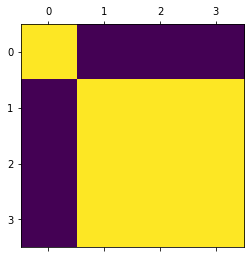

In [68]:
plt.matshow(instagram.corr())
plt.show()

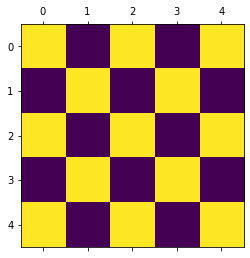

In [69]:
plt.matshow(yt.corr())
plt.show()

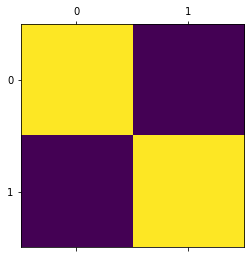

In [70]:
plt.matshow(spotify1.corr())
plt.show()

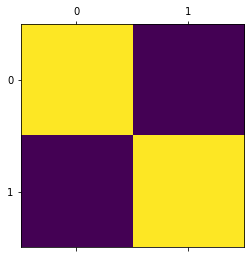

In [71]:
plt.matshow(spotify_2.corr())
plt.show()

In [73]:
agg.reset_index
agg.head()

,Position,Artist,Song,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Juice WRLD,Lucid Dreams,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lil Uzi Vert,XO TOUR Llif3,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,J. Cole,No Role Modelz,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Post Malone,rockstar,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


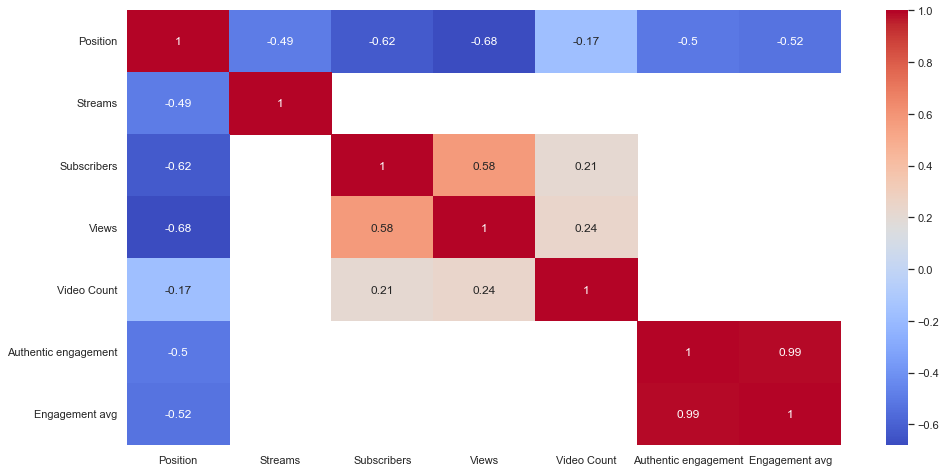

In [74]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = agg.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

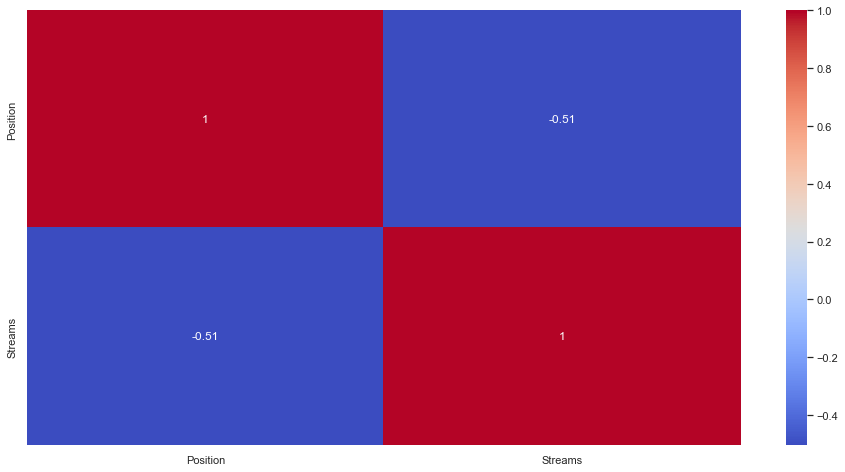

In [75]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = spotify1.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

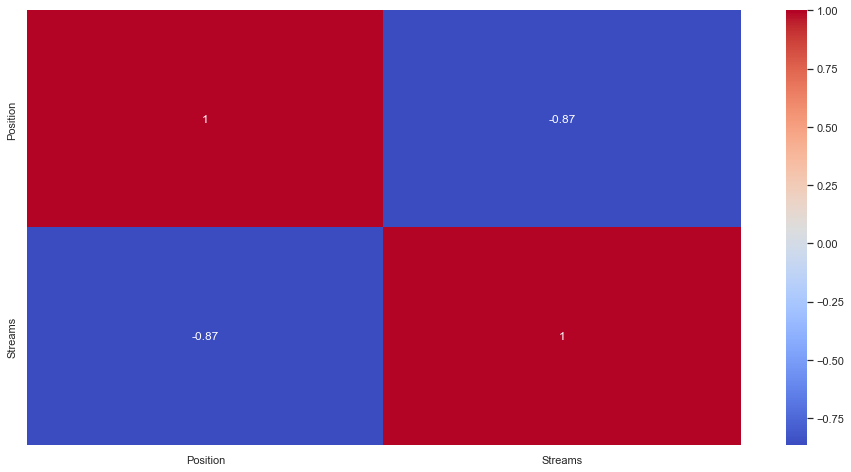

In [76]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr =spotify_2.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

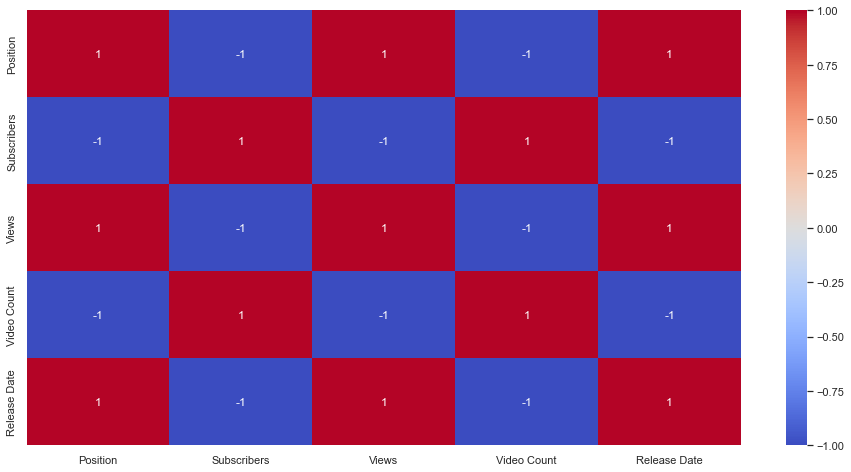

In [77]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = yt.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

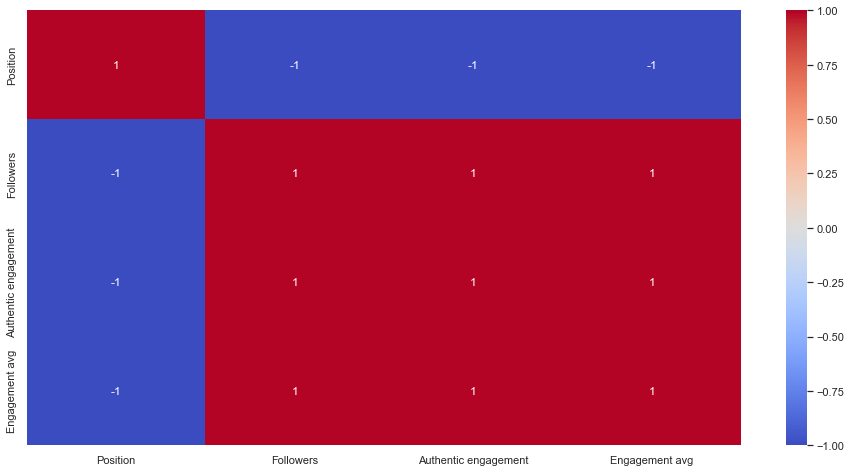

In [78]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = instagram.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

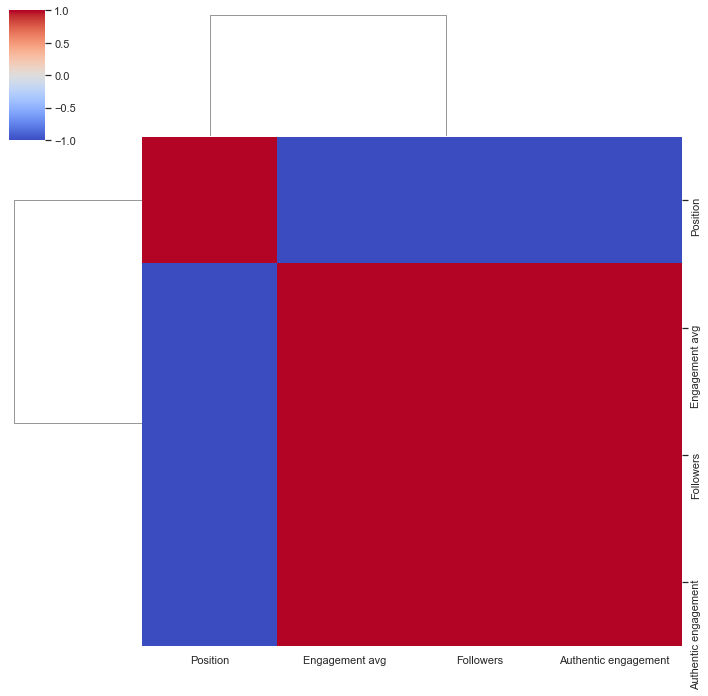

In [79]:
sns.clustermap(corr, cmap="coolwarm")

In [80]:
df=pd.DataFrame(agg_df)
print(DataFrame)
agg_df=df.to_csv('agg.csv', index=True)

<class 'pandas.core.frame.DataFrame'>


In [81]:
aggregate_to_load="agg_df;, index = False"
aggregate=pd.read_csv(aggregate_to_load)
aggregate=pd.DataFrame(aggregate) 
aggregate.head()


,Unnamed: 0,Position,Artist,Song,Release Date,Biggest Platform,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,NaN,NaN,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Juice WRLD,Lucid Dreams,NaN,NaN,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Lil Uzi Vert,XO TOUR Llif3,NaN,NaN,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,J. Cole,No Role Modelz,NaN,NaN,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Post Malone,rockstar,NaN,NaN,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [83]:
def change(aggregate,list1):
    for i in list1:
        aggregate['new'+i]=aggregate[i].apply(convert)
        aggregate['new'+i]=aggregate['new'+i].apply(lambda x: "".join(x))
        aggregate['new'+i]=aggregate['new'+i].apply(lambda x: "".join(x))
        aggregate['new'+i]=pd.to_numeric(aggregate['new'+i])
        aggregate['new'+i]=np.where(['M' in j for j in aggregate[i]],aggregate['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in aggregate[i]],aggregate['new'+i]*1000,aggregate['new'+i]))
    return aggregate
    

In [84]:
aggregate.head(2)

,Unnamed: 0,Position,Artist,Song,Release Date,Biggest Platform,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,NaN,NaN,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Juice WRLD,Lucid Dreams,NaN,NaN,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
display(aggregate.columns)

Index(['Unnamed: 0', 'Position', 'Artist', 'Song', 'Release Date',
       'Biggest Platform', 'Streams', 'Followers', 'Subscribers', 'Views',
       'Video Count', 'Authentic engagement', 'Engagement avg'],
      dtype='object')

In [86]:
display(aggregate.index)
aggregate.reset_index
aggregate.head(15)

RangeIndex(start=0, stop=11614, step=1)

,Unnamed: 0,Position,Artist,Song,Release Date,Biggest Platform,Streams,Followers,Subscribers,Views,Video Count,Authentic engagement,Engagement avg
0,0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,NaN,NaN,883369738.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Juice WRLD,Lucid Dreams,NaN,NaN,864832399.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Lil Uzi Vert,XO TOUR Llif3,NaN,NaN,781153024.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,J. Cole,No Role Modelz,NaN,NaN,734857487.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Post Malone,rockstar,NaN,NaN,718865961.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6,Travis Scott,goosebumps,NaN,NaN,672972704.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,7,The Weeknd,Blinding Lights,NaN,NaN,644287953.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,8,XXXTENTACION,Jocelyn Flores,NaN,NaN,624457164.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9,XXXTENTACION,SAD!,NaN,NaN,619879245.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,10,Juice WRLD,All Girls Are The Same,NaN,NaN,613872384.0,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
merged=aggregate.groupby(by=("Artist")).apply(lambda x: x.sort_values(["Streams"], ascending=False).head(5))

In [88]:
merged.head(15)
print(merged['Artist'].unique())
merged.shape
merged.describe()
merged.head(15)

['$NOT ' '$ilkMoney ' '$uicideboy$ ' ... '鹿 Han' '김민규' '🏛 Gusttavo Lima 🏛']


Unnamed: 0  Position        Artist  \
Artist                                                   
$NOT         3645         3645      3646         $NOT    
             4957         4957      4958         $NOT    
$ilkMoney    5247         5247      5248    $ilkMoney    
$uicideboy$  516           516       517  $uicideboy$    
             1707         1707      1708  $uicideboy$    
             3640         3640      3641  $uicideboy$    
             4032         4032      4033  $uicideboy$    
             4486         4486      4487  $uicideboy$    
*NSYNC       1098         1098      1099       *NSYNC    
             10569       10569     10570       *NSYNC    
             10670       10670     10671       *NSYNC    
+A           11522       11522       433            +A   
100 gecs     9908         9908      9909     100 gecs    
1theK (원더케이) 11279       11279       211  1theK (원더케이)   
2 Chainz     416           416       417     2 Chainz    

                                                                 Song  \
Artist                                                                  
$NOT         3645                                                Doja   
             4957                                             Whipski   
$ilkMoney    5247                                        My Potna Dem   
$uicideboy$  516    ...And to Those I Love, Thanks for Sticking Ar...   
             1707                                          Antarctica   
             3640                                         Matte Black   
             4032                  My Swisher Sweet, But My Sig Sauer   
             4486                                             Genesis   
*NSYNC       1098                     Merry Christmas, Happy Holidays   
             10569                                        Bye Bye Bye   
             10670                                   It's Gonna Be Me   
+A           11522                                                NaN   
100 gecs     9908                    hand crushed by a mallet (Remix)   
1theK (원더케이) 11279                                                NaN   
2 Chainz     416                                          It's A Vibe   

                   Release Date Biggest Platform      Streams Followers  \
Artist                                                                    
$NOT         3645           NaN              NaN    5633307.0       NaN   
             4957           NaN              NaN    2345511.0       NaN   
$ilkMoney    5247           NaN              NaN    1988450.0       NaN   
$uicideboy$  516            NaN              NaN  101882235.0       NaN   
             1707           NaN              NaN   25575127.0       NaN   
             3640           NaN              NaN    5657039.0       NaN   
             4032           NaN              NaN    4207577.0       NaN   
             4486           NaN              NaN    3044292.0       NaN   
*NSYNC       1098           NaN              NaN   45744894.0       NaN   
             10569          NaN              NaN     158867.0       NaN   
             10670          NaN              NaN     137967.0       NaN   
+A           11522          NaN              NaN          NaN  41100000   
100 gecs     9908           NaN              NaN     238674.0       NaN   
1theK (원더케이) 11279         2011              NaN          NaN       NaN   
2 Chainz     416            NaN              NaN  122067552.0       NaN   

                    Subscribers         Views  Video Count  \
Artist                                                       
$NOT         3645           NaN           NaN          NaN   
             4957           NaN           NaN          NaN   
$ilkMoney    5247           NaN           NaN          NaN   
$uicideboy$  516            NaN           NaN          NaN   
             1707           NaN           NaN          NaN   
             3640           NaN           NaN          NaN   
             4032  

In [89]:
merged.isnull().sum()

Unnamed: 0                 0
Position                   0
Artist                     0
Song                     426
Release Date            4143
Biggest Platform        4440
Streams                  422
Followers               4265
Subscribers             4243
Views                   4243
Video Count             4243
Authentic engagement    4290
Engagement avg          4290
dtype: int64

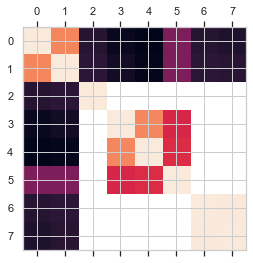

In [90]:
plt.matshow(merged.corr())
plt.show()

In [91]:
merged2=merged.sort_values(by='Engagement avg',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

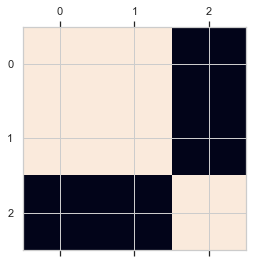

In [92]:
plt.matshow(merged2.corr())
plt.show()

In [93]:
merged2.attrs
display(merged2.attrs)

{}

In [117]:
from scipy.stats import PearsonRConstantInputWarning
from scipy.stats import pearsonr
from scipy.stats import PearsonRNearConstantInputWarning
from scipy.stats import normaltest
from scipy.stats import __all__

In [112]:
pearsonr
PearsonRNearConstantInputWarning
r, p_values = pearsonr([1,4,3,2,5],[9,10,3.5,7,5])
print(pearsonr)
print('The Pearson correlation coefficient',r)
print('P-value                            ',p_values)

print(pearsonr)

<function pearsonr at 0x00000246DAE4F828>
The Pearson correlation coefficient -0.2926028679903264
P-value                             0.6328330264982572
<function pearsonr at 0x00000246DAE4F828>


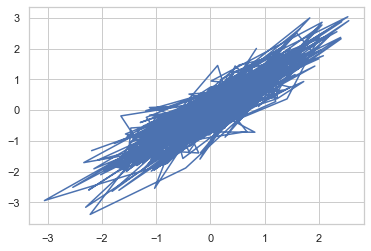

In [118]:
rng = np.random.default_rng()
s = 0.5
x =norm.rvs(size=500, random_state=rng)
e =norm.rvs(scale=s, size=500, random_state=rng)
y = x + e
pearsonr(x, y)
0.9001942438244763
plt.plot(x,y)
plt.xlabel=('rng')
plt.ylabel=('s')


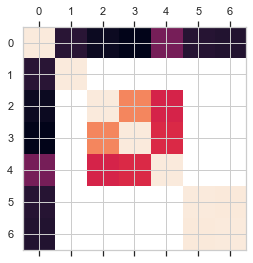

In [125]:
plt.matshow(agg.corr())

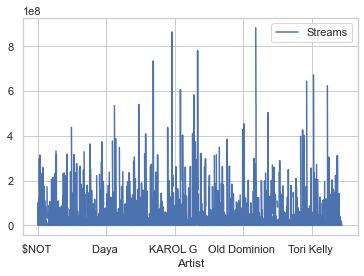

In [126]:
merged.plot(x="Artist", y=["Streams"])


In [128]:
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(0.0, 2.0, 0.01)
p_values = 1 + np.sin(2*np.pi*t)
plt.plot(r, p_values)

plt.xlabel('Song')
plt.ylabel('Artist')
plt.title('Song to Artist Correlation')
plt.grid(True)
plt.savefig("corr2.png")
plt.show()

In [129]:
print(merged2.corr())

                Unnamed: 0  Position  Engagement avg
Unnamed: 0        1.000000  0.997011       -0.620561
Position          0.997011  1.000000       -0.618116
Engagement avg   -0.620561 -0.618116        1.000000


In [130]:
#Correlation analysis between combined Youtube and Instagram followers per artist and their spotify streams and expected streams based on the number of their followers
images=['correlation.png']
correlation=images



In [141]:

np.arange=merged
#X, y =np.arange(10).reshape((5,2)), range(5)
display(np.info)
display(np.column_stack)

<function numpy.info(object=None, maxwidth=76, output=<ipykernel.iostream.OutStream object at 0x00000246D62B12C8>, toplevel='numpy')>

<function numpy.column_stack(tup)>

In [167]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import mpl_toolkits.mplot3d
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision
np.array([0.5       , 0.66666667, 0.5       , 1.        , 1.        ])
recall
np.array([1. , 1. , 0.5, 0.5, 0. ])
thresholds
np.array([0.1 , 0.35, 0.4 , 0.8 ])
display(np.array)
#list(y)

<function numpy.array>

In [178]:
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import average_precision_score


# import re
# def convert(x):
#     return re.findall('\d+\.?\d*',x)

# def change(df,list1):
#     for i in list1:
#         merged2['new'+i]=df['new'+i].apply(lambda x: "".join(x))
#         merged2['new'+i]=pd.to_numeric(df['new'+i])
#         df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
#                              np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
#     return df

# precision=dict()
# recall =dict()
# average_precision=dict()

# for i in list1:
#     precision[i], recall[1], _=precision_recall_curve  

# # # For each class
# # precision = dict()
# # recall = dict()
# # average_precision = dict()
# # for i in range(n_classes):
# #     precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
# #     average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])



In [180]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC)
classifier.fit

<bound method Pipeline.fit of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('type', <class 'sklearn.svm._classes.LinearSVC'>)])>

In [183]:
from sklearn.metrics import PrecisionRecallDisplay